## Time Dependent DFT Dataset

We want to study the properties of the time dependent Hamiltonian into the framework of the Adiabatic Approximation. We also implement a dataset maker algorithm based on the choice of random elements of the driving dataset

#### First Part: The Driving Dataset

We study the properties of the Driving Dataset such as the zero of the transverse magnetization (diagonal element of the matrix $R_{ij}$). We choose a subdataset suitable to train the DL-DFT functional

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Data

In [2]:
data=np.load('data/time_dependent_dataset/train_for_adiabatic_size_8_tf_10.0_dt_0.1_sigma_1_40_c_0_4.0_initial_field_100_n_dataset_10.npz')
z=data['density']
h=data['potential']
x=data['transverse_magnetization']
t=data['time']
l=x.shape[-1]
print(f'x.shape={x.shape} \n',f'z.shape={z.shape} \n',f'h.shape={h.shape} \n')

x.shape=(10, 100, 8) 
 z.shape=(10, 100, 8) 
 h.shape=(10, 100, 8) 



Look at some samples

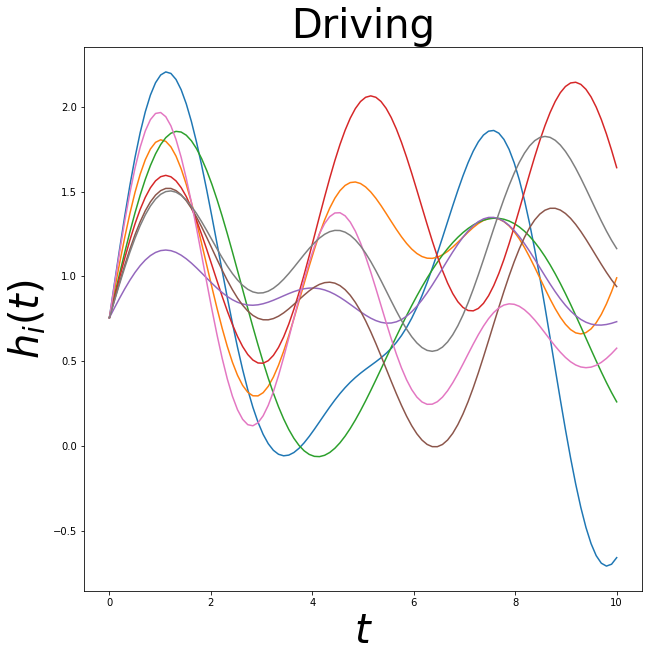

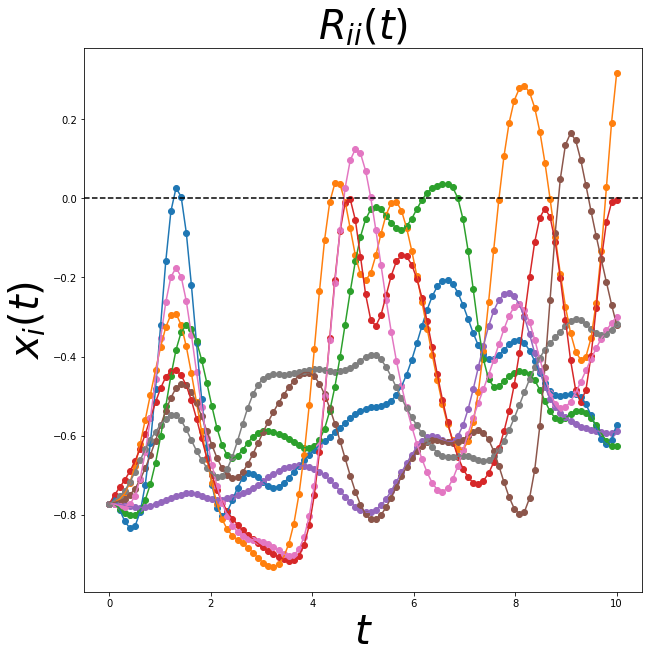

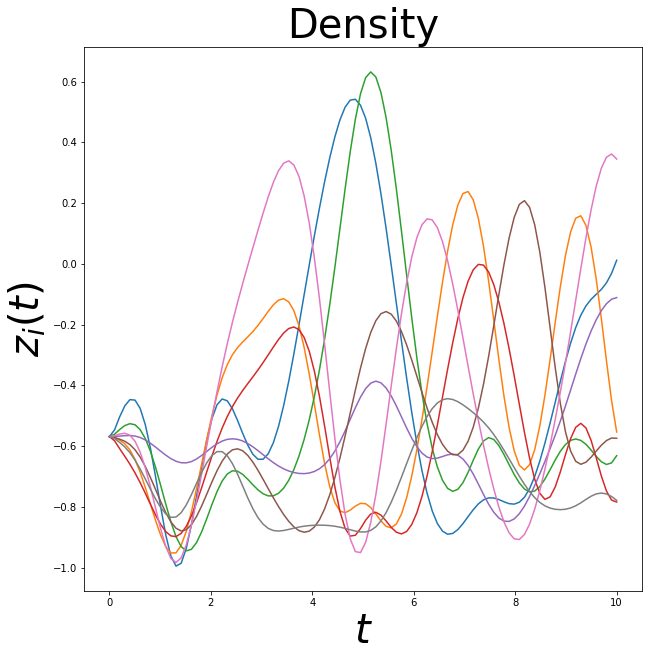

In [3]:
r=np.random.randint(0,x.shape[0])

plt.figure(figsize=(10,10))
for i in range(l):
    plt.plot(t,h[r,:,i])
plt.xlabel(r'$t$',fontsize=40)
plt.ylabel(r'$h_i(t)$',fontsize=40)
plt.title('Driving',fontsize=40)
plt.show()

plt.figure(figsize=(10,10))
for i in range(l):
    plt.plot(t,x[r,:,i])
    plt.scatter(t,x[r,:,i])
plt.axhline(y=0.,color='black',linestyle='--')
plt.xlabel(r'$t$',fontsize=40)
plt.ylabel(r'$x_i(t)$',fontsize=40)
plt.title(r'$R_{ii}(t)$',fontsize=40)
plt.show()

plt.figure(figsize=(10,10))
for i in range(l):
    plt.plot(t,z[r,:,i])
plt.xlabel(r'$t$',fontsize=40)
plt.ylabel(r'$z_i(t)$',fontsize=40)
plt.title(r'Density',fontsize=40)
plt.show()



Choose The set of fields for the DL-DFT dataset

We need to choose the $\mathbf{z}$ and $\mathbf{h}$ samples in order to make the DL-DFT dataset. We include:

- All the different initial state configurations (uniform);
- all the other configurations in time ($15 \cdot 10^4$);

In [4]:
ndata=10*100
h_gs=np.zeros(shape=(ndata,l))
z_t=np.zeros(shape=(ndata,l))

h_gs=h.reshape(-1,l)
z_t=z.reshape(-1,l)

r=np.random.permutation(h_gs.shape[0])

np.savez('data/time_dependent_dataset/preparing_dataset',density_t=z_t[r],potential=h_gs[r])

    

#### Second Part: The DL-DFT Dataset

We study the property of the DL-DFT dataset

In [62]:
data=np.load('data/time_dependent_dataset/tddft_periodic_driving_a_2_w_2_l_6_n_150000.npz')
z=data['density']
z_t=data['density_t']
f=data['density_F']
h=data['potential']

print(f'z.shape={z.shape} \n')


z.shape=(150000, 8) 



#### Histograms of the longitudinal magnetizations



In [ ]:
for i in range(l):
    plt.hist(z[:,i],bins=100,color='green')
    plt.hist(z_t[:,i],bins=100,color='red')
    #plt.hist(h[:,i],bins=100,color='grey')
    plt.show()